## Skip-Gram 모델 구현

In [1]:
from mynlp import preprocess, create_contexts_target, convert_one_hot
from nn_layers import MatMul, SoftmaxWithLoss, Adam, SGD, Trainer
import numpy as np

# contexts와 target을 구하는 함수 : mynlp.py에 추가해 놓는다
# convert_one_hot 원핫 변환 함수 : mynlp.py 에 추가해 놓는다
# Trainer 클래스  : nn_layers에 추가해 놓는다

In [2]:
class SimpleSkipGram:
    def __init__(self,vocab_size, hidden_size): # vocab_size=7,hidden_size5
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01*np.random.randn(V,H).astype('f') # (7,5)
        W_out = 0.01*np.random.randn(H,V).astype('f') # (5,7)
        
        # 계층 생성
        self.in_layer = MatMul(W_in)         # (6,7)*(7,5) = (6,5)
        self.out_layer = MatMul(W_out)       # (6,5)*(5,7) = (6,7)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [],[]
        for layer in layers : # 2회
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수 단어의 분산 표현을 저장한다.    
        self.word_vec = W_in 
        
    def predict(self, target):  # target: 입력값
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        return s
        
    def forward(self, contexts, target):  # contexts : 실제값  (6,2,7) 3차원, target: 입력값
        h = self.in_layer.forward(target)  # (6,5)
        s = self.out_layer.forward(h)      # (6,7)
        l1 = self.loss_layer1.forward(s,contexts[:,0])
        l2 = self.loss_layer2.forward(s,contexts[:,1])
        loss = l1 + l2
        return loss
    
    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

## 학습 코드 구현

In [4]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.' 
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts,target = create_contexts_target(corpus,window_size)

target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(contexts,contexts.shape)
print(target,target.shape)

# 중앙의 단어(타깃)으로부터 주변의 여러 단어(맥락)를 예측한다

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)


In [5]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model,optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 269 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 270 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 271 |  반복 1 / 2 | 시간 0[s] | 손실 2.45
| 에폭 272 |  반복 1 / 2 | 시간 0[s] | 손실 2.26
| 에폭 273 |  반복 1 / 2 | 시간 0[s] | 손실 2.67
| 에폭 274 |  반복 1 / 2 | 시간 0[s] | 손실 2.21
| 에폭 275 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 276 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 277 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 278 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 279 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 280 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 281 |  반복 1 / 2 | 시간 0[s] | 손실 2.36
| 에폭 282 |  반복 1 / 2 | 시간 0[s] | 손실 2.53
| 에폭 283 |  반복 1 / 2 | 시간 0[s] | 손실 2.00
| 에폭 284 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 285 |  반복 1 / 2 | 시간 0[s] | 손실 2.45
| 에폭 286 |  반복 1 / 2 | 시간 0[s] | 손실 2.41
| 에폭 287 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 288 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 289 |  반복 1 / 2 | 시간 0[s] | 손실 2.15
| 에폭 290 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 291 |  반복 1 / 2 | 시간 0[s] | 손실 2.32
| 에폭 292 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 293 |  반복 1

| 에폭 549 |  반복 1 / 2 | 시간 0[s] | 손실 1.99
| 에폭 550 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 551 |  반복 1 / 2 | 시간 0[s] | 손실 1.77
| 에폭 552 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 553 |  반복 1 / 2 | 시간 0[s] | 손실 1.75
| 에폭 554 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 555 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 556 |  반복 1 / 2 | 시간 0[s] | 손실 1.75
| 에폭 557 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 558 |  반복 1 / 2 | 시간 0[s] | 손실 1.99
| 에폭 559 |  반복 1 / 2 | 시간 0[s] | 손실 1.99
| 에폭 560 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 561 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 562 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 563 |  반복 1 / 2 | 시간 0[s] | 손실 1.75
| 에폭 564 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 565 |  반복 1 / 2 | 시간 0[s] | 손실 1.72
| 에폭 566 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 567 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 568 |  반복 1 / 2 | 시간 0[s] | 손실 1.76
| 에폭 569 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 570 |  반복 1 / 2 | 시간 0[s] | 손실 1.51
| 에폭 571 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 572 |  반복 1 / 2 | 시간 0[s] | 손실 1.96
| 에폭 573 |  반복 1

| 에폭 837 |  반복 1 / 2 | 시간 0[s] | 손실 1.68
| 에폭 838 |  반복 1 / 2 | 시간 0[s] | 손실 2.11
| 에폭 839 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 840 |  반복 1 / 2 | 시간 0[s] | 손실 1.67
| 에폭 841 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 842 |  반복 1 / 2 | 시간 0[s] | 손실 1.68
| 에폭 843 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 844 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 845 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 846 |  반복 1 / 2 | 시간 0[s] | 손실 1.68
| 에폭 847 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 848 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 849 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 850 |  반복 1 / 2 | 시간 0[s] | 손실 1.67
| 에폭 851 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 852 |  반복 1 / 2 | 시간 0[s] | 손실 1.88
| 에폭 853 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 854 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 855 |  반복 1 / 2 | 시간 0[s] | 손실 1.67
| 에폭 856 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 857 |  반복 1 / 2 | 시간 0[s] | 손실 1.68
| 에폭 858 |  반복 1 / 2 | 시간 0[s] | 손실 1.88
| 에폭 859 |  반복 1 / 2 | 시간 0[s] | 손실 1.68
| 에폭 860 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 861 |  반복 1

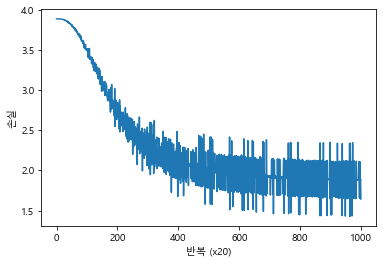

In [6]:
trainer.plot()

In [7]:
# W_in : 인스턴스 변수인 단어의 분산 표현
word_vecs = model.word_vec # (7,5)

for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

       you :  [-0.01524168  0.0049005   0.00294077 -0.01571065 -0.00288951]
       say :  [ 0.9031398   0.8814568   0.6738258  -0.88504535  1.288434  ]
   goodbye :  [-0.878874   -0.86200786  0.9738761   0.8486178  -0.93275845]
       and :  [ 1.0282952  1.0370709  1.0313923 -1.022168  -1.211414 ]
         i :  [-0.86599016 -0.8601639   0.97330165  0.8524856  -0.9216963 ]
     hello :  [-1.0243058  -0.99555725 -1.097419    0.97607785  0.6901194 ]
         . :  [ 0.00170471  0.00972625  0.0098227  -0.00272624  0.00432381]


## 예측과 정확도 평가

In [9]:
# 예측
h = model.predict(target)
# print(h)
print(h.shape) # (6,7)

(6, 7)


In [10]:
h = model.predict(target[0,:])  # [0, 1, 0, 0, 0, 0, 0],'say', (7,)
print(h.shape)   # (7,)
print(h)
pred0 = np.argmax(h,0)
h1 = h
h1[pred0] = 0
pred1 = np.argmax(h1,0)

c0 = np.argmax(contexts[0,0,:],0)
c1 = np.argmax(contexts[0,1,:],0)

print('contexs : ', c0,c1)
print('predict : ', pred0,pred1)

(7,)
[ 2.43984558 -4.49349232  2.46569803 -2.69926392  2.46469299  2.43744195
 -1.42433077]
contexs :  0 2
predict :  2 4


In [11]:
h = model.predict(target[1,:])  # [0, 0, 1, 0, 0, 0, 0],'goodbye', (7,)
print(h.shape)   # (7,)
print(h)
pred0 = np.argmax(h,0)
h1 = h
h1[pred0] = 0
pred1 = np.argmax(h1,0)

c0 = np.argmax(contexts[1,0,:],0)
c1 = np.argmax(contexts[1,1,:],0)

print('contexs : ', c0,c1)
print('predict : ', pred0,pred1)

(7,)
[-2.42873014  3.91286788 -1.51469509  3.91954892 -1.50010235 -2.39555641
 -0.55467492]
contexs :  1 3
predict :  3 1


In [12]:
print(contexts, contexts.shape)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)


In [13]:
print(contexts[0,:,:])

[[1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]


In [14]:
print(target,target.shape)
print(target[0,:])

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)
[0 1 0 0 0 0 0]


In [15]:
# 정확도
def get_correct(num):
    h = model.predict(target[num,:])  
    pred0 = np.argmax(h,0)
    h1 = h
    h[pred0] = 0
    pred1 = np.argmax(h1,0)
    c0 = np.argmax(contexts[num,0,:],0) 
    c1 = np.argmax(contexts[num,1,:],0) 
    print('context : ',c0,c1)
    print('predict : ',pred0,pred1)
    print('-'*50)
    correct = 0
    if (c0==pred0)|(c0==pred1):
        correct +=1
    if (c1==pred0)|(c1==pred1):
        correct +=1
    return correct  


print('[contexts:실제값', 'predict:예측값]')

acc = 0
for k in range(target.shape[0]): # 6회
    correct = get_correct(k)
    acc += correct
print(acc)    
accuracy = acc/target.shape[0]/2       # 12로 나눔 , 10/12 = 0.8333

print('정확도 :', np.round(accuracy,4)) # 정확도가 CBOW에 비해 비교적 높음

[contexts:실제값 predict:예측값]
context :  0 2
predict :  2 4
--------------------------------------------------
context :  1 3
predict :  3 1
--------------------------------------------------
context :  2 4
predict :  2 4
--------------------------------------------------
context :  3 1
predict :  3 1
--------------------------------------------------
context :  4 5
predict :  2 4
--------------------------------------------------
context :  1 6
predict :  6 1
--------------------------------------------------
10
정확도 : 0.8333
